# Basic Visualization

**Introduction to Python for Data Science** \
Course with Hacktiv8

***

**Sesi 7**

Selasa, 8 Juni 2021 • 19:00 - 22:00 WIB

-   Explorasi Dataset
-   Visualisasi Data:
    -   Line Plot
    -   Area Plot
    -   Histogram
    -   Bar Chart
    -   Pie Chart
    -   Box Plot

Kamis, 10 Juni 2021 • 19:00 - 22:00 WIB

-   Visualisasi Data:
    -   Scatter Plot
    -   Subplots

***

## Exploring Datasets with _pandas_

Dataset: **Immigration to Canada from 1980 to 2013**

Importing libraries:

In [1]:
import pandas as pd
import numpy as np

Load dataset:

In [2]:
df_can = pd.read_excel('dataset/Canada.xlsx', sheet_name='Canada by Citizenship', skiprows=range(20), skipfooter=2, usecols=[c for c in range(0, 43)])

In [3]:
df_can

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,Immigrants,Foreigners,Viet Nam,935,Asia,920,South-Eastern Asia,902,Developing regions,1191,...,1816,1852,3153,2574,1784,2171,1942,1723,1731,2112
191,Immigrants,Foreigners,Western Sahara,903,Africa,912,Northern Africa,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
192,Immigrants,Foreigners,Yemen,935,Asia,922,Western Asia,902,Developing regions,1,...,124,161,140,122,133,128,211,160,174,217
193,Immigrants,Foreigners,Zambia,903,Africa,910,Eastern Africa,902,Developing regions,11,...,56,91,77,71,64,60,102,69,46,59


In [4]:
df_can.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 43 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Type      195 non-null    object
 1   Coverage  195 non-null    object
 2   OdName    195 non-null    object
 3   AREA      195 non-null    int64 
 4   AreaName  195 non-null    object
 5   REG       195 non-null    int64 
 6   RegName   195 non-null    object
 7   DEV       195 non-null    int64 
 8   DevName   195 non-null    object
 9   1980      195 non-null    int64 
 10  1981      195 non-null    int64 
 11  1982      195 non-null    int64 
 12  1983      195 non-null    int64 
 13  1984      195 non-null    int64 
 14  1985      195 non-null    int64 
 15  1986      195 non-null    int64 
 16  1987      195 non-null    int64 
 17  1988      195 non-null    int64 
 18  1989      195 non-null    int64 
 19  1990      195 non-null    int64 
 20  1991      195 non-null    int64 
 21  1992      195 no

Membersihkan kolom yang tidak perlu:

In [5]:
df_can.drop(['Type', 'Coverage', 'AREA', 'REG', 'DEV'], axis=1, inplace=True)
df_can.columns.values

array(['OdName', 'AreaName', 'RegName', 'DevName', 1980, 1981, 1982, 1983,
       1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994,
       1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005,
       2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013], dtype=object)

Mengganti nama kolom:

In [6]:
df_can.rename(columns={'OdName':'Country', 'AreaName':'Continent', 'RegName':'Region'}, inplace=True)
df_can.columns.values

array(['Country', 'Continent', 'Region', 'DevName', 1980, 1981, 1982,
       1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993,
       1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004,
       2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013], dtype=object)

Menambahkan kolom baru yaitu `total` yaitu jumlah total per barisnya:

In [7]:
df_can['Total'] = df_can.sum(axis=1)

Cek lagi data framenya:

In [8]:
df_can

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1223,856,702,560,716,561,539,620,603,15699
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,1,1,0,0,0,0,1,1,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,Viet Nam,Asia,South-Eastern Asia,Developing regions,1191,1829,2162,3404,7583,5907,...,1852,3153,2574,1784,2171,1942,1723,1731,2112,97146
191,Western Sahara,Africa,Northern Africa,Developing regions,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,2
192,Yemen,Asia,Western Asia,Developing regions,1,2,1,6,0,18,...,161,140,122,133,128,211,160,174,217,2985
193,Zambia,Africa,Eastern Africa,Developing regions,11,17,11,7,16,9,...,91,77,71,64,60,102,69,46,59,1677


Cek jumlah nilai unik untuk kolom `Country`:

In [9]:
df_can.Country.nunique()

195

Set kolom `Country` menjadi indeks:

In [10]:
df_can.set_index('Country', inplace=True)
df_can

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Viet Nam,Asia,South-Eastern Asia,Developing regions,1191,1829,2162,3404,7583,5907,2741,...,1852,3153,2574,1784,2171,1942,1723,1731,2112,97146
Western Sahara,Africa,Northern Africa,Developing regions,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,2
Yemen,Asia,Western Asia,Developing regions,1,2,1,6,0,18,7,...,161,140,122,133,128,211,160,174,217,2985


Indexing data:

In [11]:
df_can.loc['Japan', range(1985, 2000)]

1985     198
1986     248
1987     422
1988     324
1989     494
1990     379
1991     506
1992     605
1993     907
1994     956
1995     826
1996     994
1997     924
1998     897
1999    1083
Name: Japan, dtype: object

In [12]:
years = list(range(1980, 2014))
print(years)

[1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013]


In [13]:
df_can.loc[df_can.Region == 'South-Eastern Asia', years]

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
Brunei Darussalam,79,6,8,2,2,4,12,16,103,63,...,3,4,5,11,10,5,12,6,3,6
Cambodia,12,19,26,33,10,7,8,14,15,27,...,348,370,529,460,354,203,200,196,233,288
Indonesia,186,178,252,115,123,100,127,213,270,260,...,552,632,613,657,661,504,712,390,395,387
Lao People's Democratic Republic,11,6,16,16,7,17,21,20,22,44,...,38,42,74,53,32,39,54,22,25,15
Malaysia,786,816,813,448,384,374,425,817,2072,2346,...,401,593,580,600,658,640,802,409,358,204
Myanmar,80,62,46,31,41,23,18,33,55,77,...,191,210,953,1887,975,1153,556,368,193,262
Philippines,6051,5921,5249,4562,3801,3150,4166,7360,8639,11865,...,14004,18139,18400,19837,24887,28573,38617,36765,34315,29544
Singapore,241,301,337,169,128,139,205,372,808,1269,...,311,392,298,690,734,366,805,219,146,141
Thailand,56,53,113,65,82,66,78,117,147,177,...,392,575,500,487,519,512,499,396,296,400


## Visualizing Data using Matplotlib

Matplotlib: Standard Python Visualization Library

Import library:

In [14]:
import matplotlib.pyplot as plt

Melihat daftar _style_ plot yang ada:

In [15]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

Applying style:

In [16]:
plt.style.use(['ggplot'])

Mengambil contoh data dari negara Haiti:

In [17]:
haiti = df_can.loc['Haiti', years]
haiti

1980    1666
1981    3692
1982    3498
1983    2860
1984    1418
1985    1321
1986    1753
1987    2132
1988    1829
1989    2377
1990    2379
1991    2829
1992    2399
1993    3655
1994    2100
1995    2014
1996    1955
1997    1645
1998    1295
1999    1439
2000    1631
2001    2433
2002    2174
2003    1930
2004    1652
2005    1682
2006    1619
2007    1598
2008    2491
2009    2080
2010    4744
2011    6503
2012    5868
2013    4152
Name: Haiti, dtype: object

### Line Plots

Mulai plot data:

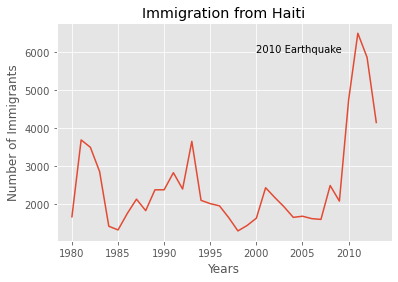

In [18]:
haiti.plot()
plt.title('Immigration from Haiti')
plt.xlabel('Years')
plt.ylabel('Number of Immigrants')
plt.text(2000, 6000, '2010 Earthquake')
plt.show()

Membandingkan data China & India:

In [19]:
ci = df_can.loc[['China', 'India'], years]
ci.T

Country,China,India
1980,5123,8880
1981,6682,8670
1982,3308,8147
1983,1863,7338
1984,1527,5704
1985,1816,4211
1986,1960,7150
1987,2643,10189
1988,2758,11522
1989,4323,10343


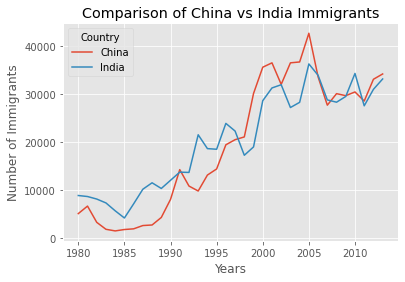

In [20]:
ci.T.plot()
plt.title('Comparison of China vs India Immigrants')
plt.xlabel('Years')
plt.ylabel('Number of Immigrants')
plt.show()

**Compare the trend of top 5 countries that contributed the most to immigration to Canada**

In [21]:
df_top5 = df_can.sort_values('Total', ascending=False)
df_top5 = df_top5.head(5)
df_top5 = df_top5[years].T

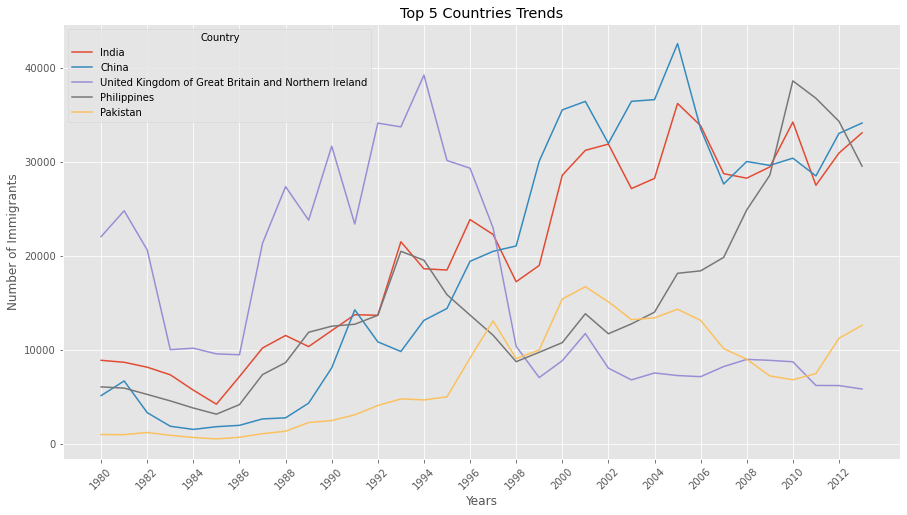

In [22]:
df_top5.plot(figsize=(15, 8))
plt.title('Top 5 Countries Trends')
plt.xlabel('Years')
plt.ylabel('Number of Immigrants')
plt.xticks(years[::2], rotation=45)
plt.show()

### Area Plot

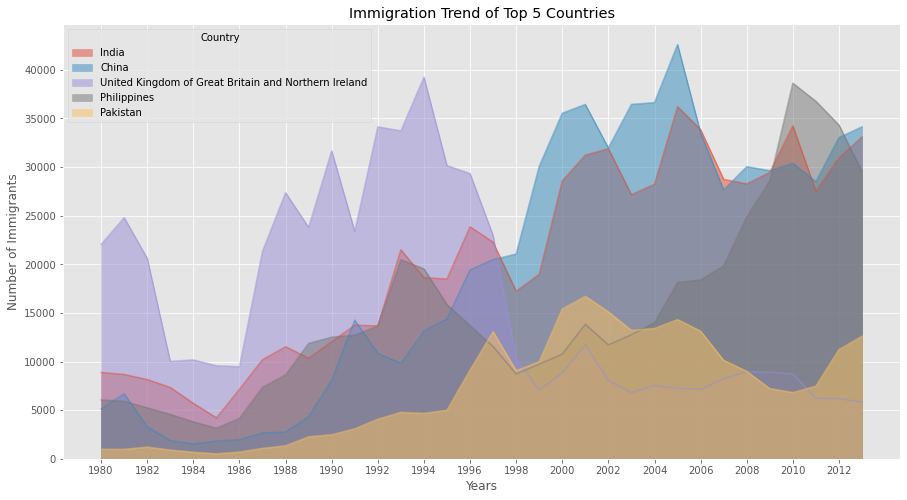

In [23]:
df_top5.plot(kind='area', stacked=False, figsize=(15, 8))
plt.title('Immigration Trend of Top 5 Countries')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')
plt.xticks(years[::2])
plt.show()

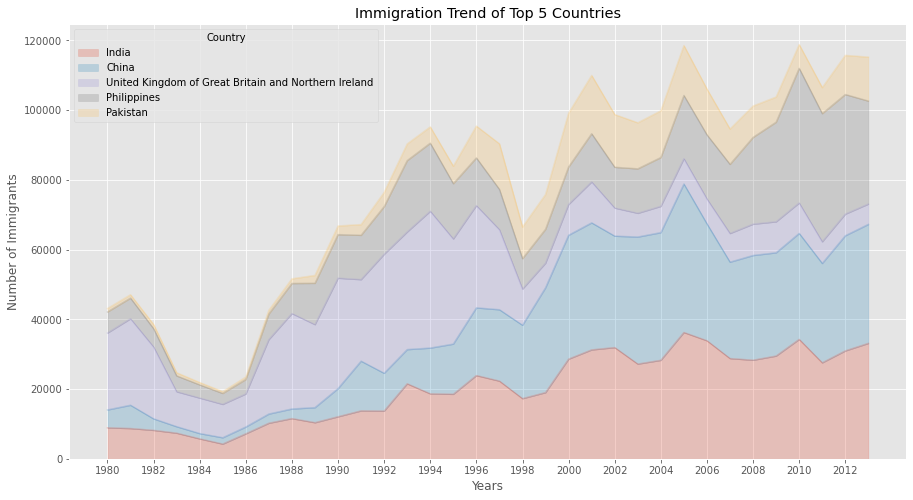

In [24]:
df_top5.plot(kind='area', alpha=0.25, figsize=(15, 8))
plt.title('Immigration Trend of Top 5 Countries')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')
plt.xticks(years[::2])
plt.show()

### Two Types of Plotting

**Option 1**: Scripting layer (procedural method)

Use the scripting layer to create a stacked area plot of the 5 countries that contributed the least to immigration to Canada from 1980 to 2013. Use a transparency value of 0.45.

In [25]:
df_least5 = df_can.sort_values('Total').head(5)
df_least5 = df_least5[years].T

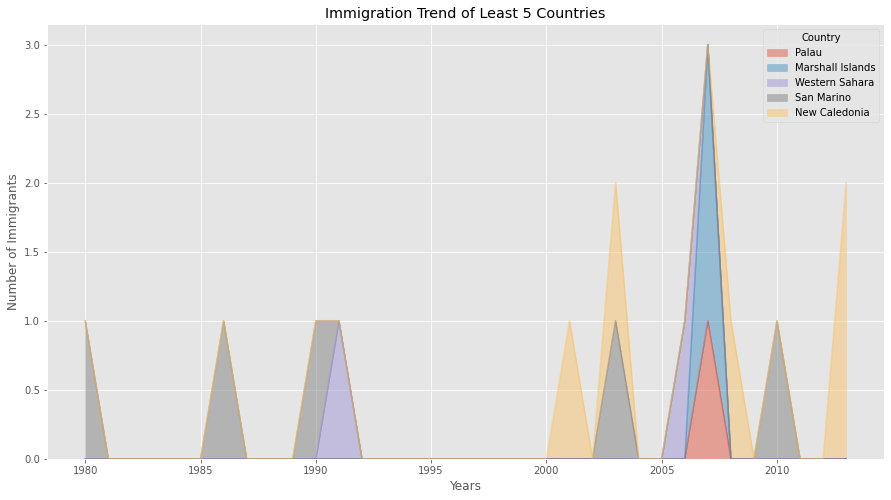

In [26]:
df_least5.plot(kind='area', alpha=0.45, stacked=True, figsize=(15, 8))
plt.title('Immigration Trend of Least 5 Countries')
plt.xlabel('Years')
plt.ylabel('Number of Immigrants')
plt.show()

**Option 2**: Artist layer (Object oriented method) - using an Axes instance from Matplotlib (preferred)

Use the artist layer to create an unstacked area plot of the 5 countries that contributed the least to immigration to Canada from 1980 to 2013. Use a transparency value of 0.55.

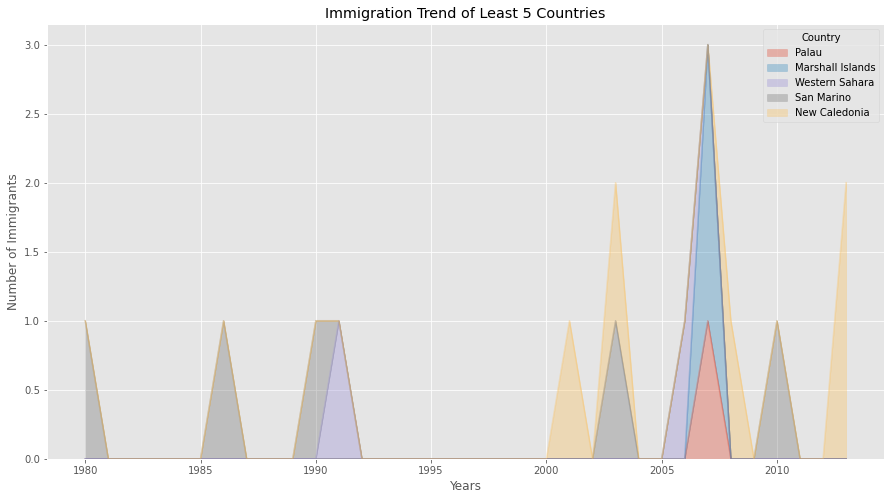

In [27]:
ax = df_least5.plot(kind='area', alpha=0.35, figsize=(15, 8))
ax.set_title('Immigration Trend of Least 5 Countries')
ax.set_xlabel('Years')
ax.set_ylabel('Number of Immigrants')
plt.show()

### Histogram

What is the frequency distribution of the number (population) of new immigrants from the various countries to Canada in 2013?

In [28]:
df_can[2013].head()

Country
Afghanistan       2004
Albania            603
Algeria           4331
American Samoa       0
Andorra              1
Name: 2013, dtype: int64

In [29]:
count, bin_edges = np.histogram(df_can[2013])
print(count)
print(bin_edges)

[178  11   1   2   0   0   0   0   1   2]
[    0.   3412.9  6825.8 10238.7 13651.6 17064.5 20477.4 23890.3 27303.2
 30716.1 34129. ]


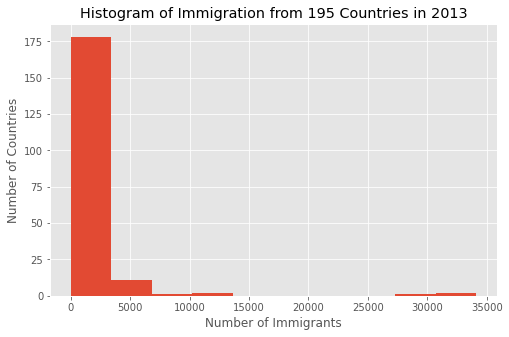

In [30]:
df_can[2013].plot(kind='hist', figsize=(8,5))
plt.title('Histogram of Immigration from 195 Countries in 2013')
plt.xlabel('Number of Immigrants')
plt.ylabel('Number of Countries')
plt.show()

What is the immigration distribution for Denmark, Norway, and Sweden for years 1980-2013?

In [31]:
df_t = df_can.loc[['Denmark', 'Norway', 'Sweden'], years].T
df_t.head()

Country,Denmark,Norway,Sweden
1980,272,116,281
1981,293,77,308
1982,299,106,222
1983,106,51,176
1984,93,31,128


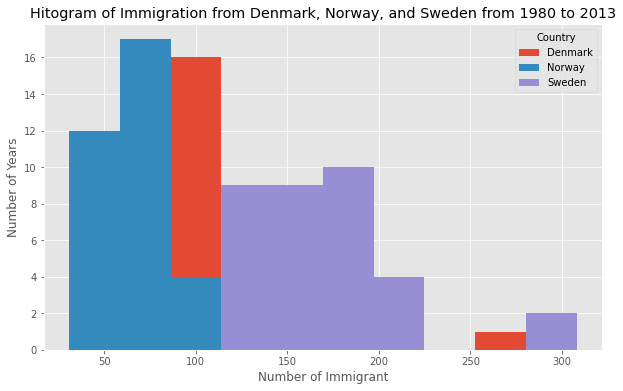

In [32]:
df_t.plot(kind='hist', figsize=(10, 6))
plt.title('Hitogram of Immigration from Denmark, Norway, and Sweden from 1980 to 2013')
plt.xlabel('Number of Immigrant')
plt.ylabel('Number of Years')
plt.show()

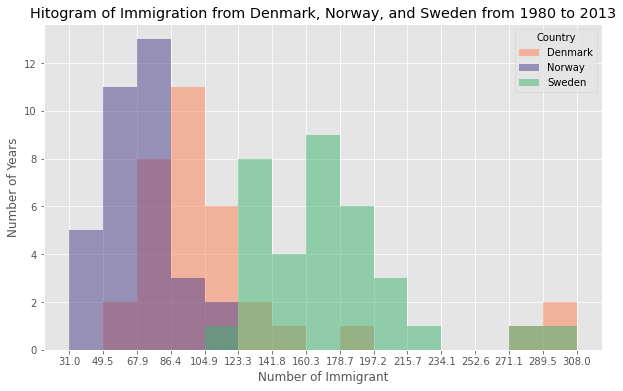

In [33]:
count, bin_edges = np.histogram(df_t, 15)

df_t.plot(kind='hist', figsize=(10, 6), bins=15, alpha=0.5, xticks=bin_edges, color=['coral', 'darkslateblue', 'mediumseagreen'])

plt.title('Hitogram of Immigration from Denmark, Norway, and Sweden from 1980 to 2013')
plt.xlabel('Number of Immigrant')
plt.ylabel('Number of Years')
plt.show()

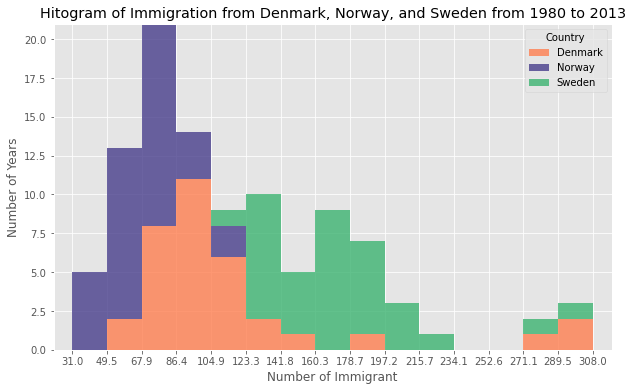

In [34]:
count, bin_edges = np.histogram(df_t, 15)
xmin = bin_edges[0] - 10
xmax = bin_edges[-1] + 10

df_t.plot(kind='hist', figsize=(10, 6), bins=15, alpha=0.8, xticks=bin_edges, color=['coral', 'darkslateblue', 'mediumseagreen'], stacked=True, xlim=(xmin, xmax))

plt.title('Hitogram of Immigration from Denmark, Norway, and Sweden from 1980 to 2013')
plt.xlabel('Number of Immigrant')
plt.ylabel('Number of Years')
plt.show()

Use the scripting layer to display the immigration distribution for Greece, Albania, and Bulgaria for years 1980-2013. Use an overlapping plot with 15 bins and a transparency value of 0.35.

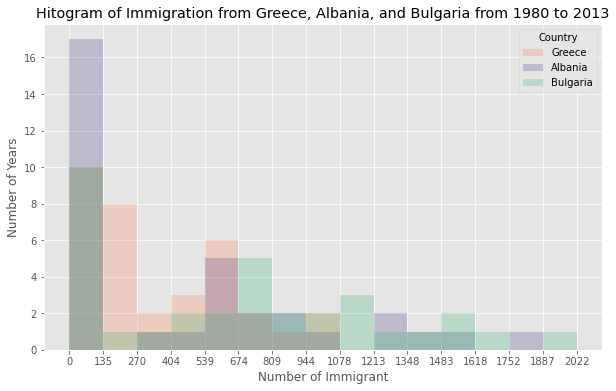

In [35]:
df_cof = df_can.loc[['Greece', 'Albania', 'Bulgaria'], years].T

count, bin_edges = np.histogram(df_cof, 15)

df_cof.plot(kind='hist', figsize=(10, 6), bins=15, alpha=0.25, xticks=bin_edges, color=['coral', 'darkslateblue', 'mediumseagreen'])

plt.title('Hitogram of Immigration from Greece, Albania, and Bulgaria from 1980 to 2013')
plt.xlabel('Number of Immigrant')
plt.ylabel('Number of Years')
plt.show()

### Bar Charts

#### Vertical Bar Plot

Let's start off by analyzing **the effect of Iceland's Financial Crisis**:

> Krisis Keuangan Islandia 2008 - 2011 adalah peristiwa ekonomi dan politik utama di Islandia. Dibandingkan dengan peristiwa ekonominya, keruntuhan perbankan sistemik Islandia adalah yang terbesar dialami oleh negara mana pun dalam sejarah ekonomi. Krisis tersebut menyebabkan depresi ekonomi yang parah pada tahun 2008 - 2011 dan kerusuhan politik yang signifikan.

Let's compare the number of Icelandic immigrants (country = 'Iceland') to Canada from year 1980 to 2013.

In [36]:
df_iceland = df_can.loc['Iceland', years]
df_iceland.head()

1980    17
1981    33
1982    10
1983     9
1984    13
Name: Iceland, dtype: object

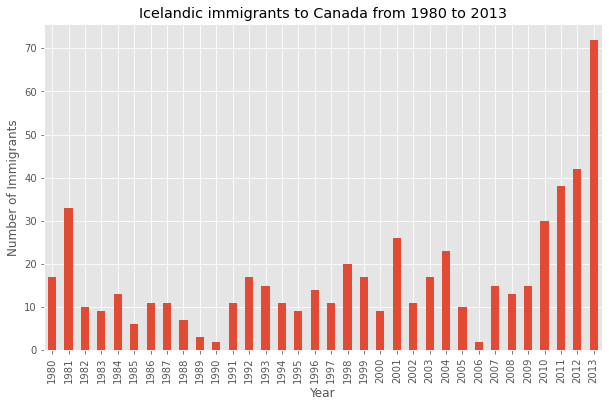

In [37]:
df_iceland.plot(kind='bar', figsize=(10, 6))

plt.title('Icelandic immigrants to Canada from 1980 to 2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')
plt.show()

Mari kita beri anotasi pada plot menggunakan metode annotate pada scripting layer atau antarmuka pyplot. Kita akan passing parameter berikut:

- `s`: str, the text of annotation.
- `xy`: Tuple specifying the (x,y) point to annotate (in this case, end point of arrow).
- `xytext`: Tuple specifying the (x,y) point to place the text (in this case, start point of arrow).
- `xycoords`: The coordinate system that xy is given in - 'data' uses the coordinate system of the object being annotated (default).
- `arrowprops`: Takes a dictionary of properties to draw the arrow:
    - `arrowstyle`: Specifies the arrow style, `'->'` is standard arrow.
    - `connectionstyle`: Specifies the connection type. `arc3` is a straight line.
    - `color`: Specifes color of arror.
    - `lw`: Specifies the line width.

Mari kita juga memberi anotasi pada teks untuk berada diatas panah. Kita akan meneruskan parameter tambahan berikut:

- `rotation`: rotation angle of text in degrees (counter clockwise)
- `va`: vertical alignment of text `[‘center’ | ‘top’ | ‘bottom’ | ‘baseline’]`
- `ha`: horizontal alignment of text `[‘center’ | ‘right’ | ‘left’]`


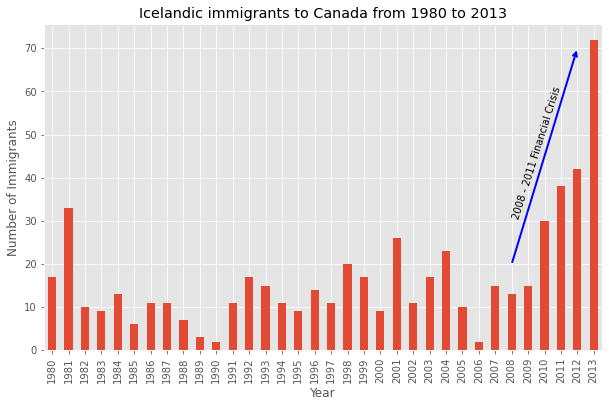

In [38]:
df_iceland.plot(kind='bar', figsize=(10, 6), rot=90)

plt.title('Icelandic immigrants to Canada from 1980 to 2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')

plt.annotate(
    '',
    xy=(32, 70), 
    xytext=(28, 20), 
    xycoords='data', 
    arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2)
)

plt.annotate(
    '2008 - 2011 Financial Crisis',
    xy=(28, 30),
    rotation=72.5,
    va='bottom',
    ha='left',
)

plt.show()

#### Horizontal Bar Plot

Using the scripting layter and the df_can dataset, create a horizontal bar plot showing the total number of immigrants to Canada from the top 15 countries, for the period 1980-2013. Label each country with the total immigrant count.

In [39]:
df_can.sort_values(by='Total', ascending=True, inplace=True)
df_top15 = df_can['Total'].tail(15)
df_top15

Country
Romania                                                  93585
Viet Nam                                                 97146
Jamaica                                                 106431
France                                                  109091
Lebanon                                                 115359
Poland                                                  139241
Republic of Korea                                       142581
Sri Lanka                                               148358
Iran (Islamic Republic of)                              175923
United States of America                                241122
Pakistan                                                241600
Philippines                                             511391
United Kingdom of Great Britain and Northern Ireland    551500
China                                                   659962
India                                                   691904
Name: Total, dtype: int64

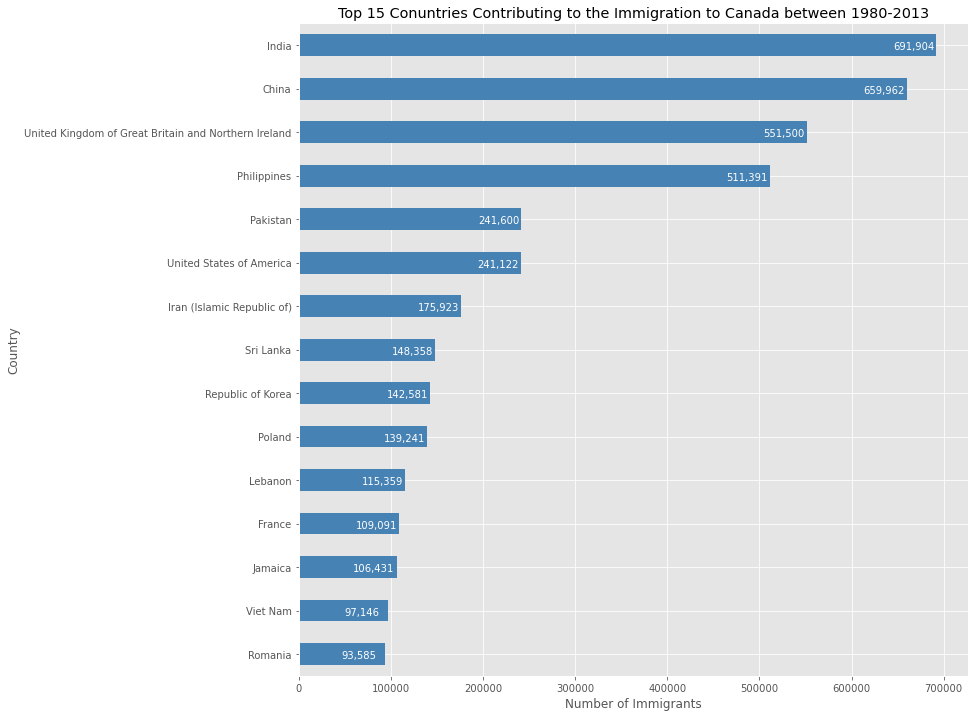

In [40]:
df_top15.plot(kind='barh', figsize=(12, 12), color='steelblue')
plt.title('Top 15 Conuntries Contributing to the Immigration to Canada between 1980-2013')
plt.xlabel('Number of Immigrants')

for index, value in enumerate(df_top15):
    label = format(int(value), ',')
    plt.annotate(label, xy=(value - 47000, index - 0.10), color='white')

plt.show()

### Pie Chart

In [41]:
df_cont = df_can.groupby('Continent', axis=0).sum()
df_cont

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Continent,,,,,,,,,,,,,,,,,,,,,
Africa,3951,4363,3819,2671,2639,2650,3782,7494,7552,9894,...,27523,29188,28284,29890,34534,40892,35441,38083,38543,618948
Asia,31025,34314,30214,24696,27274,23850,28739,43203,47454,60256,...,159253,149054,133459,139894,141434,163845,146894,152218,155075,3317794
Europe,39760,44802,42720,24638,22287,20844,24370,46698,54726,60893,...,35955,33053,33495,34692,35078,33425,26778,29177,28691,1410947
Latin America and the Caribbean,13081,15215,16769,15427,13678,15171,21179,28471,21924,25060,...,24747,24676,26011,26547,26867,28818,27856,27173,24950,765148
Northern America,9378,10030,9074,7100,6661,6543,7074,7705,6469,6790,...,8394,9613,9463,10190,8995,8142,7677,7892,8503,241142
Oceania,1942,1839,1675,1018,878,920,904,1200,1181,1539,...,1585,1473,1693,1834,1860,1834,1548,1679,1775,55174


Parameter:

- `autopct` - is a string or function used to label the wedges with their numeric value. The label will be placed inside the wedge. If it is a format string, the label will be `fmt%pct`.
- `startangle` - rotates the start of the pie chart by angle degrees counterclockwise from the x-axis.
- `shadow` - Draws a shadow beneath the pie (to give a 3D feel).


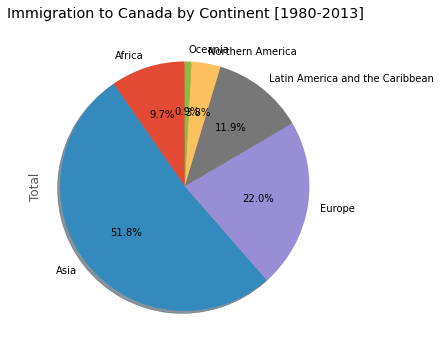

In [42]:
df_cont['Total'].plot(kind='pie', figsize=(5, 6), autopct='%1.1f%%', startangle=90, shadow=True)

plt.title('Immigration to Canada by Continent [1980-2013]')
plt.axis('equal')
plt.show()

- Remove the text labels on the pie chart by passing in `legend` and add it as a seperate legend using `plt.legend()`.
- Push out the percentages to sit just outside the pie chart by passing in `pctdistance` parameter.
- Pass in a custom set of colors for continents by passing in `colors` parameter.
- Explode the pie chart to emphasize the lowest three continents (Africa, North America, and Latin America and Carribbean) by pasing in `explode` parameter.


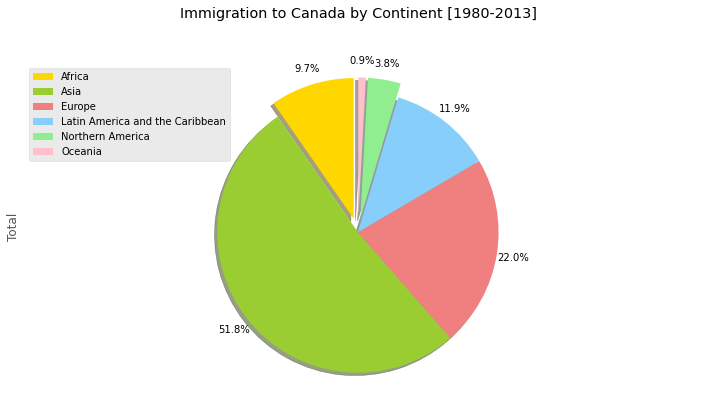

In [43]:
colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink']
explode_list = [0.1, 0, 0, 0, 0.1, 0.1]

df_cont['Total'].plot(kind='pie',figsize=(12, 6), autopct='%1.1f%%', startangle=90, shadow=True,
                      labels=None, pctdistance=1.12, colors=colors_list, explode=explode_list)

plt.title('Immigration to Canada by Continent [1980-2013]', y=1.12) 
plt.axis('equal') 
plt.legend(labels=df_cont.index, loc='upper left') 
plt.show()

Using a pie chart, explore the proportion (percentage) of new immigrants grouped by continents in the year 2013.

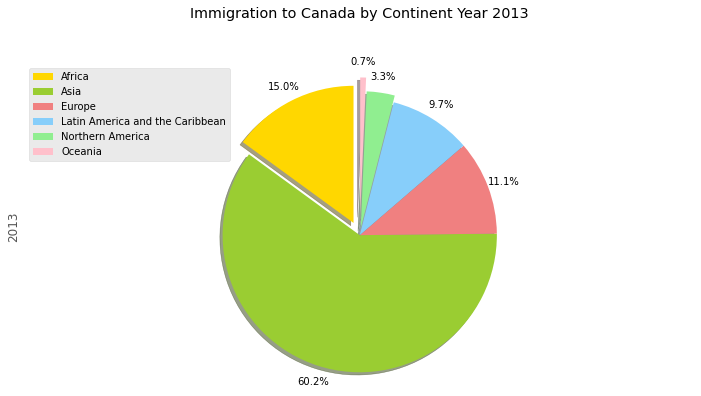

In [44]:
colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink']
explode_list = [0.1, 0, 0, 0, 0.05, 0.15]

df_cont[2013].plot(kind='pie', figsize=(12, 6), autopct='%1.1f%%', startangle=90, shadow=True, labels=None, pctdistance=1.12, colors=colors_list, explode=explode_list)

plt.title('Immigration to Canada by Continent Year 2013', y=1.12) 
plt.axis('equal') 
plt.legend(labels=df_cont.index, loc='upper left') 
plt.show()


### Box Plots

In [45]:
df_japan = df_can.loc[['Japan'], years].T
df_japan.head()

Country,Japan
1980,701
1981,756
1982,598
1983,309
1984,246


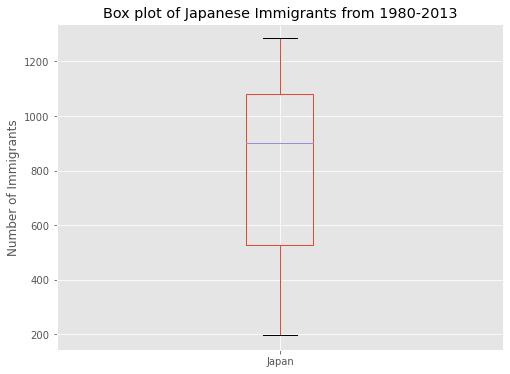

In [46]:
df_japan.plot(kind='box', figsize=(8,6))
plt.title('Box plot of Japanese Immigrants from 1980-2013')
plt.ylabel('Number of Immigrants')
plt.show()

In [47]:
df_japan.describe()

Country,Japan
count,34.000000
mean,814.911765
std,337.219771
min,198.000000
25%,529.000000
50%,902.000000
75%,1079.000000
max,1284.000000


Compare the distribution of the number of new immigrants from India and China for the period 1980-2013.

In [48]:
df_ci = df_can.loc[['India', 'China'], years].T
df_ci.head()

Country,India,China
1980,8880,5123
1981,8670,6682
1982,8147,3308
1983,7338,1863
1984,5704,1527


In [49]:
df_ci.describe()

Country,India,China
count,34.000000,34.000000
mean,20350.117647,19410.647059
std,10007.342579,13568.230790
min,4211.000000,1527.000000
25%,10637.750000,5512.750000
50%,20235.000000,19945.000000
75%,28699.500000,31568.500000
max,36210.000000,42584.000000


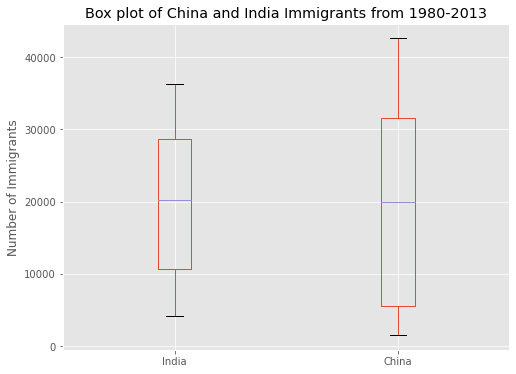

In [50]:
df_ci.plot(kind='box', figsize=(8,6))
plt.title('Box plot of China and India Immigrants from 1980-2013')
plt.ylabel('Number of Immigrants')
plt.show()

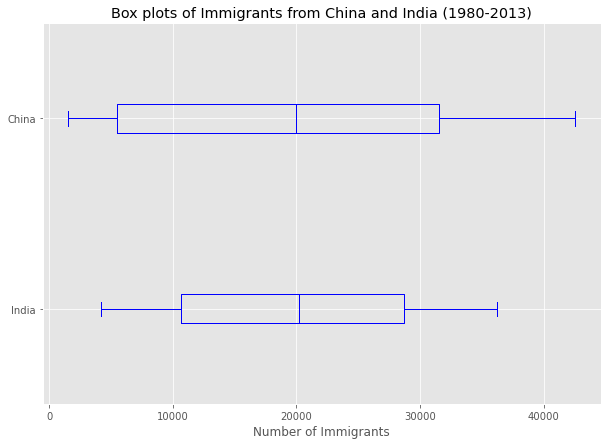

In [51]:
df_ci.plot(kind='box', figsize=(10, 7), color='blue', vert=False)
plt.title('Box plots of Immigrants from China and India (1980-2013)')
plt.xlabel('Number of Immigrants')
plt.show()

### Scatter Plots

In [52]:
df_tot = df_can[years].sum().reset_index()
df_tot.columns = ['year', 'total']
df_tot.head()

,year,total
0,1980,99137
1,1981,110563
2,1982,104271
3,1983,75550
4,1984,73417


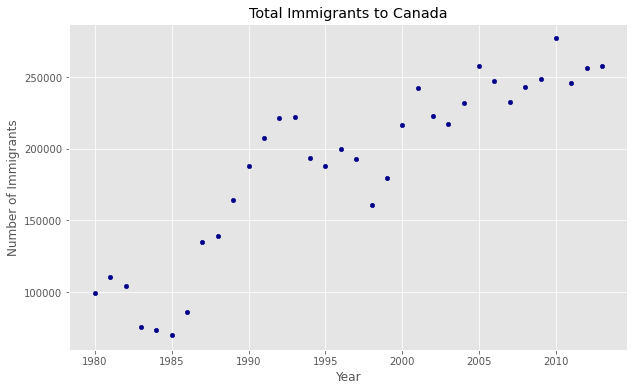

In [53]:
df_tot.plot(kind='scatter', x='year', y='total', figsize=(10, 6), color='darkblue')
plt.title('Total Immigrants to Canada')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')
plt.show()

Create a scatter plot of the total immigration from Denmark, Norway, and Sweden to Canada from 1980 to 2013:

In [54]:
df_countries = df_can.loc[['Denmark', 'Norway', 'Sweden'], years].transpose()
df_total = pd.DataFrame(df_countries.sum(axis=1))
df_total.reset_index(inplace=True)
df_total.columns = ['year', 'total']
df_total['year'] = df_total['year'].astype(int)
df_total.head()

,year,total
0,1980,669
1,1981,678
2,1982,627
3,1983,333
4,1984,252


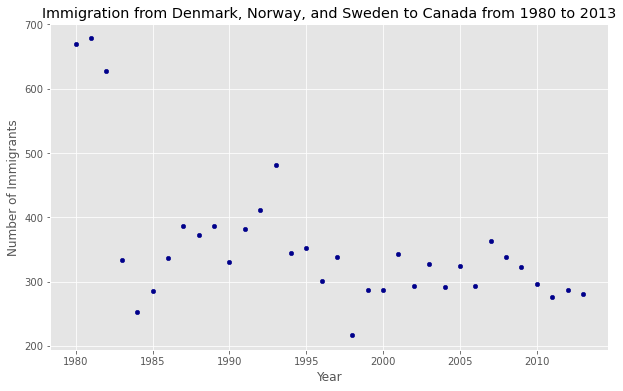

In [55]:
df_total.plot(kind='scatter', x='year', y='total', figsize=(10, 6), color='darkblue')
plt.title('Immigration from Denmark, Norway, and Sweden to Canada from 1980 to 2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')
plt.show()

### Subplots

Memvisualisasikan beberapa plot dalam figure yang sama

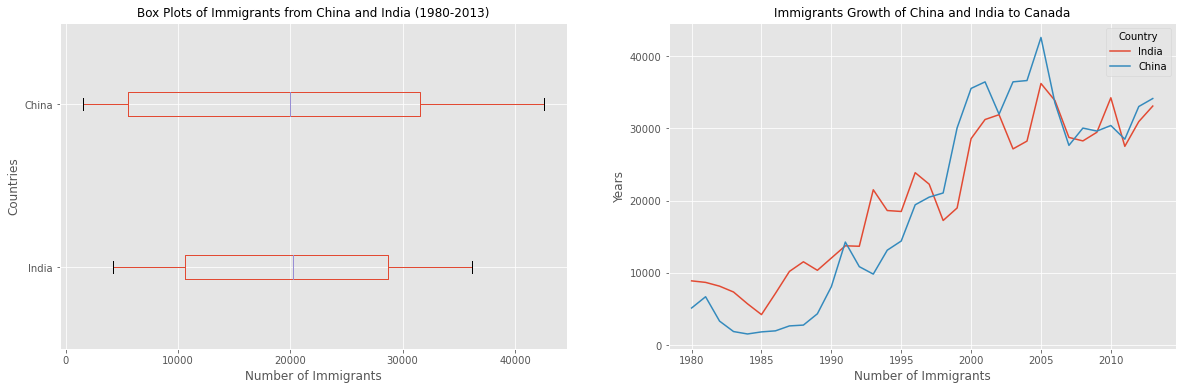

In [56]:
fig = plt.figure(figsize=(20, 6))

ax0 = fig.add_subplot(1, 2, 1)
ax1 = fig.add_subplot(1, 2, 2)

df_ci.plot(kind='box', vert=False, ax=ax0)
ax0.set_title('Box Plots of Immigrants from China and India (1980-2013)', fontdict={'fontsize': 12})
ax0.set_xlabel('Number of Immigrants')
ax0.set_ylabel('Countries')

df_ci.plot(kind='line', ax=ax1)
ax1.set_title('Immigrants Growth of China and India to Canada', fontdict={'fontsize': 12})
ax1.set_xlabel('Number of Immigrants')
ax1.set_ylabel('Years')

plt.show()

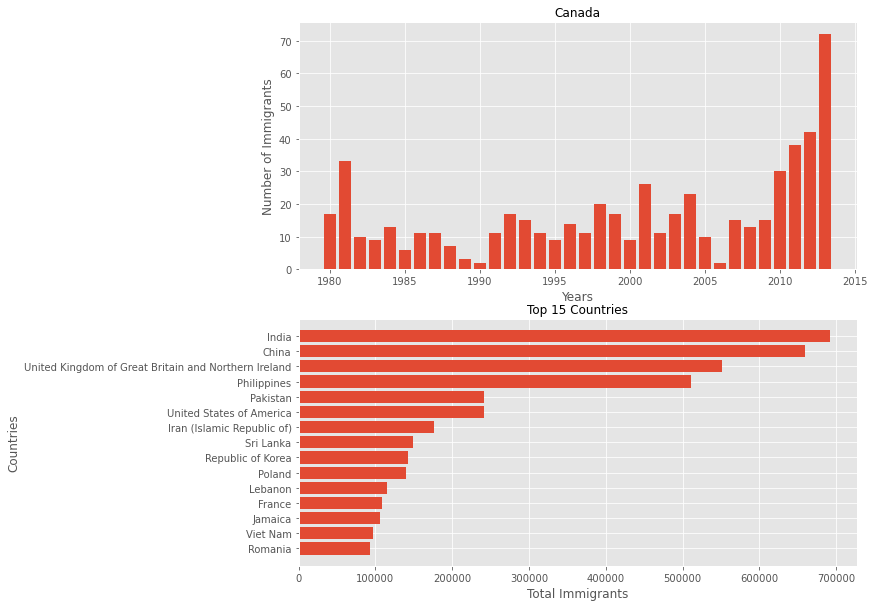

In [57]:
plt.figure(figsize=(10, 10))

plt.subplot(211)
plt.bar(df_iceland.index, df_iceland.values)
plt.xlabel('Years')
plt.ylabel('Number of Immigrants')
plt.title('Canada', fontdict={'fontsize': 12})

plt.subplot(212)
plt.barh(df_top15.index, df_top15.values)
plt.xlabel('Total Immigrants')
plt.ylabel('Countries')
plt.title('Top 15 Countries', fontdict={'fontsize': 12})

plt.show()